# Polynomial Regression

## What is polynomial regression?

In this tutorial, we will look at a type of regression called polynomial regression. While linear regression looks at modelling continuous relationships with straight lines (i.e. can be expressed with y = mx + c), polynomial regression adds more terms to turn the line used to model relationships into a quadratic, cubic or higher (so polynomial regression models relationships with lines that can be modeled with y = ax^3 + bx^2 + cx + d for example). This allows more complex relationships to be modelled than what is possible with *linear* regression.

## So how does it work?

As discussed previously, Polynomial regression aims to plot the line y = ax^3 + bx^2 + cx + d (up to whichever order of x is required - the higher, the more complex the curve) in which the variables a, b, c, and d are optimised so that the line they describe follows the data in the best way possible.

The few key elements involved with the learning process of polynomial regression:
 - the input variables (or features)
 - the output variables (or targets)
 - the optimiser
 - the loss function
 - the model

## Linear Regression

Linear regression is very similar to polynomial regression, as it uses all the same ideas, but with fewer inputs (becasue y = mx + c only has m and c to be optimised).

In this section we will look at making a linear regression model in python.

To start off, we will gerneate out own dataset for ease of use. The dataset will be generated along the straight line `y = 1.2x - 10`. This way we can ensure that the problem is able to be modelled by a straight line. 

This equation could be an example for calculating a rough estimate for someone's salary in USD (y) given their age (x) 

In [1]:
import numpy as np

variation = 5
datapoints = 500

# this makes an array of 500 (the value of datapoints) values that are evenly
# spaced between 25 and 50 (these are the x values of the points of out dataset)
x_values = np.linspace(25, 50, datapoints) 
y_values = []                             

for i in range(datapoints):
    # This is where the above equation of the line is used
    y_value = 1.2 * x_values[i] - 10
    # Sampling data point from a normal distribution 
    y_value_random = np.random.normal(y_value, variation) 
    y_values.append(y_value_random)

y_values = np.array(y_values)

We can then plot a graph for the relationship between salary and age

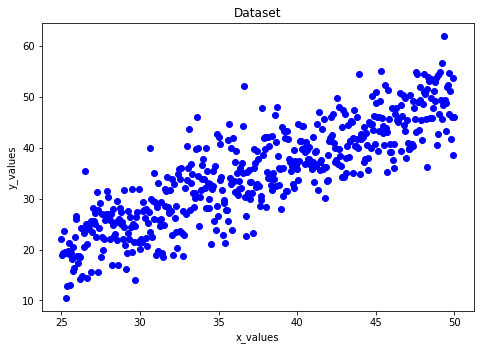

In [2]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x_values, y_values, color='b')
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_title('Dataset')
plt.show()

Here will use an object oriented approach to making the linear regression model.

There are two main parts to the `linear_regression` class:
 - The training function (**`.fit()`**)
 - The prediction function (**`.predict()`**)

The linear regression model has as set of weights, which it multiplies element wise with the inputs and then takes a sum of them (whis is what `np.dot()` does) to get the output. As well as the inputs, there is also a *bias* that has its own weight and is treated as an input that is permanently set to 1. By doing this, each input is multiplied by a weight and then added to the bias to get an output, giving us: `output = input * weight + bias`. We can substitute output for `y` and input for `x` and we get `y = x * weight + bias` - a version of `y = mx + c`, the equation of a straight line. This is all worked out by the **`predict()`** function:
```python
def predict(self, x):
  return np.dot(x, self.weights[1:]) + self.weights[0]
```

The predict function, however, is only useful when its weights have been optimised so that the line they plot for the relationship between the inputs and outputs is the line of best fit for the data. Optimising the weights is the job of the **`.fit()`** function - this is where the *learning* takes place.

When we run the this function, the first thing it does is to initialize the weights. There are many different ways to do this, but we'll just start them off as 0s for ease of use:
```python
self.weights = np.zeros(1 + x.shape[1]) ## initialise weights
```

After that, beigns the training loop. This loops over the whole training set `epochs` number of times. Increasing this means that the model will train for longer, but also will usually make the model more effective as well.

Each time the loop runs, there are 3 main steps:
1. The model must make predictions for the data. To do this, we put all the data into our `predict()` function:
```python
output = self.predict(x) # step 1
```

2. The model calculates the errors made by the model. This is done by taking the correct answers and deducting the predictions from them:
```python
errors = (y - output) # step 2
```

3. finally, we need to update the weights using the errors we just calculated. To do this, we use a process called **gradient descent**. Looing at the graph below, the y axis is the cost and the x axis is the weight. Our goal is to find the minimum point of this function - the value for our weight where the cost is as low as possible.

  Before we can find the gradient, however, we must define our *cost* function. This is the error function we intend to minimize for optimum weights.

  For our regression model, we will use the sum of squared errors cost function (SSE), which is calculated by:
```python
loss = (errors ** 2).sum() / 2
```
The partial derivative of the above cost function is:

  ```
  - sum(y_correct - y_predicted) * inputs
  ```
or in python:
```python
 - x.T.dot(errors)
```
  ![alt text](https://i0.wp.com/1.bp.blogspot.com/-06p1QCE3GOY/XQAIeBNNA6I/AAAAAAAAEio/RdxPhBcnlSEiMc03_b-ClHat8s--XgImgCLcBGAs/s400/grada.png?resize=400%2C248&ssl=1)

The proportion of our gradient that we take away is called the *learning rate* and has to be optimised by us.

  Now that we have all this, we can update out weights and biases with the python code:
```python
self.weights[1:] += self.learning_rate * x.T.dot(errors) ## step 3
self.weights[0] += self.learning_rate * errors.sum()
```

In [3]:
class linear_regression(object):
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, x, y):
        # initialise weights
        self.weights = np.zeros(1 + x.shape[1])
        self.loss = []
        for i in range(self.epochs):
            ## step 1
            output = self.predict(x)
            ## step 2
            errors = (y - output)
            ## step 3
            self.weights[1:] += self.learning_rate * x.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            loss = (errors ** 2).sum() / 2
            self.loss.append(loss)
        return self

    def predict(self, x):
        return np.dot(x, self.weights[1:]) + self.weights[0]

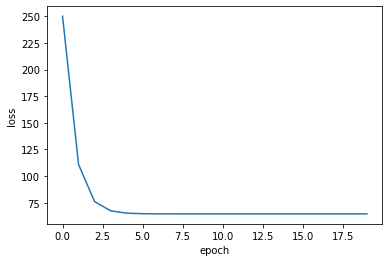

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

x_values = x_values.reshape(datapoints, 1)

stder_x = StandardScaler()
stder_y = StandardScaler()

x_train = stder_x.fit_transform(x_values)
# np.newaxis used to increase the dimension
y_train = stder_y.fit_transform(y_values[:, np.newaxis]).flatten() 

lr_model = linear_regression(0.003, 20)
lr_model.fit(x_train, y_train)

plt.plot(lr_model.loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

y_predictions = lr_model.predict(x_train)

When we plot a graph of our the line produced from our predictions and the data we trained on, it is clear that the model has successfully learnt the relationship between the data

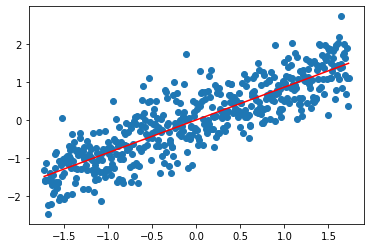

In [5]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predictions, color='red')
plt.show()

## Turning linear regression into polynomial regression

To turn our linear regression model into a polynomial regression model, we need to not only have weights for the x input, but also x^2, x^3 and so on (to however high we want). This will allow our model to return a line that is not straight.

For example, we could then have:
```python
prediction = weight[2] * x ** 2 + weight[1] * x + weight[0]
```

which would produce a quadratic line.

To get results for our polynomial regression lines, we simply have to pass the new x features to our linear regression model and it will perform polynomial regression. We can use the `PolynomialFeatures` class from SciKitLearn to add new features with:
```python
x_quad_train = quadratic.fit_transform(x_train)
x_cub_train = cubic.fit_transform(x_train)
```
and then repeat the code we have already made 3 times: one for linear regression, one for quadratic and one for cubic. Their parameters need some slight adjustments, but, apart from that, the process is almost exactly the same as that of linear regression (using same `linear_regression` class).

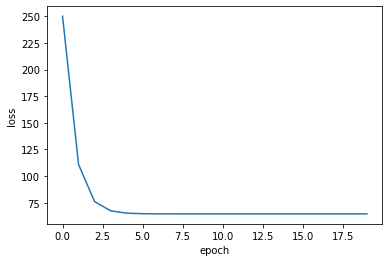

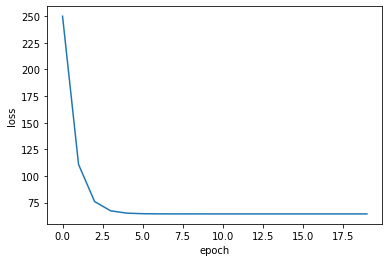

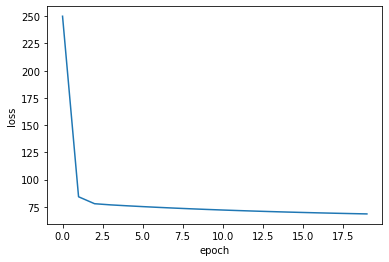

In [6]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

x_quad_train = quadratic.fit_transform(x_train)
x_cub_train = cubic.fit_transform(x_train)

lr = linear_regression(0.003, 20)
qr = linear_regression(0.001, 20)
cr = linear_regression(0.0005, 20)

lr.fit(x_train, y_train)
qr.fit(x_quad_train, y_train)
cr.fit(x_cub_train, y_train)

plt.plot(lr.loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(qr.loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

plt.plot(cr.loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

y_predictions_l = lr.predict(x_train)
y_predictions_q = qr.predict(x_quad_train)
y_predictions_c = cr.predict(x_cub_train)

Here we can see the lines produced by the three models. The data is linear, so the polynomial regression models do not curve very much, but you can still see a curve on the yellow cubic line (the green quadratic likely has its weight term for the x^2 input set to 0 as it has become a straight line - in fact, it is exactly the same as the linear line, which is why it covers it)

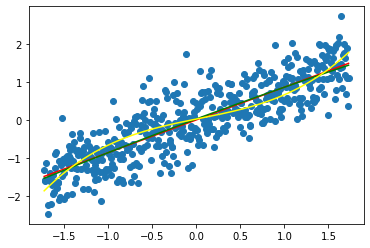

In [7]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predictions_l, color='red')
plt.plot(x_train, y_predictions_q, color='green')
plt.plot(x_train, y_predictions_c, color='yellow')
plt.show()